# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name : Lennart Overdevest
### ID : 4374436

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Download the following datasets and place in folder 'data':
[Scenario 9](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow)
[Scenario 10](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow)
[Scenario 11](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow)
[Scenario 12](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow)

## 1. Familiarization and discretization task – 1 A4

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import familiarization as fam

import warnings
warnings.filterwarnings('ignore')

# Read, process and divide data
data = fam.load_data("data/capture20110818.binetflow.csv")
pdata = fam.pre_process(data)
infected_hosts = pdata.loc[pdata["Infected"] == 1]
non_infected_hosts = pdata.loc[pdata["Infected"] == 0]

# Compare statistics for infected and non-infected hosts
## Average Duration
duration_infected = np.mean(infected_hosts["Duration"])
duration_non_infected = np.mean(non_infected_hosts["Duration"])

## Protocol
protocols_infected = infected_hosts.Protocol.value_counts(normalize=True)
protocols_non_infected = non_infected_hosts.Protocol.value_counts(normalize=True)

## Average TotalPackets
packets_infected = np.mean(infected_hosts.TotalPackets)
packets_non_infected = np.mean(non_infected_hosts.TotalPackets)

## Average TotalBytes
bytes_infected = np.mean(infected_hosts.TotalBytes)
bytes_non_infected = np.mean(non_infected_hosts.TotalBytes)

## Average SourceBytes
source_bytes_infected = np.mean(infected_hosts.SourceBytes)
source_bytes_non_infected = np.mean(non_infected_hosts.SourceBytes)

print("Infected hosts")
print(" Duration:", duration_infected)
print(" Average Packets",packets_infected)
print(" Average Bytes",bytes_infected)
print(" Source Bytes",source_bytes_infected)
print(" Protocols: \n",protocols_infected)

print("\n")
print("Non-Infected hosts")
print(" Duration:", duration_non_infected)
print(" Average Packets",packets_non_infected)
print(" Average Bytes",bytes_non_infected)
print(" Source Bytes",source_bytes_non_infected)
print(" Protocols: \n",protocols_non_infected)

# Visualize protocols used to show difference between infected and non-infected hosts
protocol_grouped = pdata.groupby('Infected')['Protocol'].value_counts(normalize=True)
protocol_grouped = protocol_grouped.mul(100)
protocol_grouped = protocol_grouped.rename('percent').reset_index()

print()
print("Figure 1: Difference in distribution for infected and non-infected hosts")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Protocol',y='percent',hue='Infected',data=protocol_grouped)
ax.set_title("Protocols used for infected and non-infected hosts",size=16)
ax.set_ylabel("Percentage",size=14)
ax.set_xlabel("Protocols",size=14)
plt.show()

/Users/lennartoverdevest/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Infected hosts
 Duration: 90.82559153096321
 Average Packets 30.315330224161276
 Average Bytes 27129.65718557244
 Source Bytes 27121.20417105461
 Protocols: 
 ICMP    0.996474
UDP     0.002755
TCP     0.000771
Name: Protocol, dtype: float64


Non-Infected hosts
 Duration: 46.585669888622455
 Average Packets 35.74916387959866
 Average Bytes 27199.363854357292
 Source Bytes 1660.3409478134663
 Protocols: 
 UDP     0.617152
TCP     0.337162
ICMP    0.044993
ARP     0.000694
Name: Protocol, dtype: float64

Figure 1: Difference in distribution for infected and non-infected hosts


<Figure size 1000x600 with 1 Axes>

### 1b. Discretize selected features

Figure 4: Discretized Protocol and Duration features for an infected and non-infected host


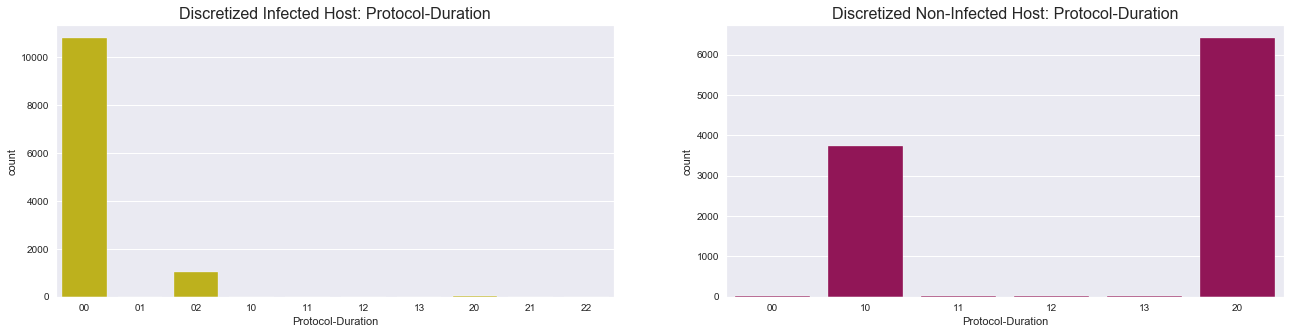

Figure 5: Discretized Protocol and Duration features for all infected and non-infected hosts


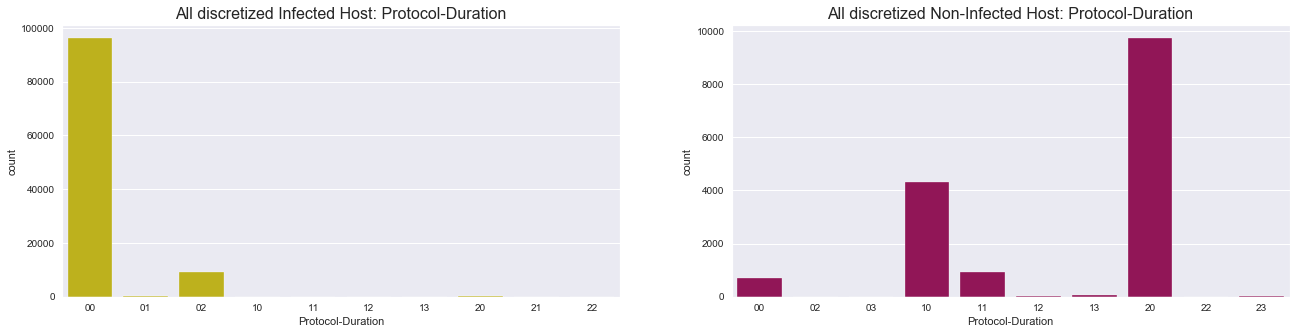

In [2]:
# Encode protocol names
pdata["Protocol"] = fam.encode_feature(pdata["Protocol"])

# Select all infected and non-infected hosts
infected_hosts = pdata.loc[pdata["Infected"] == 1]
non_infected_hosts = pdata.loc[pdata["Infected"] == 0]

# Select infected host with most entries in dataset
infected_host = pdata.loc[pdata["SourceAddress"] == fam.select_infected_host(pdata)]
non_infected_host = pdata.loc[pdata["SourceAddress"] == fam.select_non_infected_host(pdata)]

# Apply Elbow method to find optimal number of bins
features = ["Protocol","Duration"]
# for feature in features:
#     print("Figure "+str(features.index(feature)+2)+": Optimal number of bins for feature "+feature+" of infected host "+fam.select_infected_host(pdata))
#     fam.elbow(infected_host,feature)

# Optimal number of bins for Protocol and Duration feature
nbins = [3,4]

# Descretization of one infected/non-infected host
discretized_infected = pd.DataFrame()
discretized_non_infected = pd.DataFrame()

for feature, nbin in zip(features,nbins):
    discretized_infected[feature], binsedges_infected = fam.discretize_feature(infected_host, feature, nbin, "kmeans")
    discretized_non_infected[feature], binsedges_non_infected = fam.discretize_feature(non_infected_host, feature, nbin, "kmeans")

discretized_infected["Protocol-Duration"] = discretized_infected.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)
discretized_non_infected["Protocol-Duration"] = discretized_non_infected.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)

print("Figure 4: Discretized Protocol and Duration features for an infected and non-infected host")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(22,5))
sns.countplot(x="Protocol-Duration", data=discretized_infected, color="y", ax=ax1)
sns.countplot(x="Protocol-Duration", data=discretized_non_infected, color="m", ax=ax2)
ax1.set_title("Discretized Infected Host: Protocol-Duration", size=16)
ax2.set_title("Discretized Non-Infected Host: Protocol-Duration", size=16)
plt.show()

# Discretization of all hosts
discretized_infected_all = pd.DataFrame()
discretized_non_infected_all = pd.DataFrame()

for feature, nbin in zip(features,nbins):
    discretized_infected_all[feature], binsedges_infected = fam.discretize_feature(infected_hosts, feature, nbin, "kmeans")
    discretized_non_infected_all[feature], binsedges_non_infected = fam.discretize_feature(non_infected_hosts, feature, nbin, "kmeans")

discretized_infected_all["Protocol-Duration"] = discretized_infected_all.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)
discretized_non_infected_all["Protocol-Duration"] = discretized_non_infected_all.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)

print("Figure 5: Discretized Protocol and Duration features for all infected and non-infected hosts")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(22,5))
sns.countplot(x="Protocol-Duration", data=discretized_infected_all, color="y", ax=ax1)
sns.countplot(x="Protocol-Duration", data=discretized_non_infected_all, color="m", ax=ax2)
ax1.set_title("All discretized Infected Host: Protocol-Duration", size=16)
ax2.set_title("All discretized Non-Infected Host: Protocol-Duration", size=16)
plt.show()

### 1b. Answers and explanation

Stream data is a continous flow of data that builds up rapidly. To be able to process and quickly judge the individual flows, discretization can be applied. Discretization breaks the very high number of degrees of freedom for each feature into small groups/categories/bins such that is easier to understand and process the data. Another advantage of discretization is that not every model is able to work with continuous data. For each feature the values are split into a number of bins (N). Bins can be filled according to multiple methods: uniform, quantile and kmeans. Some data is more suitable for one method than the other, e.g. kmeans is good applicable if the data consists of several clusters and uniform (equal-width bins) if the data is equally distributed.

After processing the data the first thing to find out is which features are most suitable for discretization. Looking at the numbers we quickly see that the duration, sourcebytes, and protocols (see Figure 1) are quite different between the infected and non-infected flows. After further investigation we find that the protocol and duration feature looks most promising. For the infected hosts almost all flow uses the ICMP protocol, while the non-infected hosts mostly use UDP and TCP. The duration of a flow for infected hosts is almost twice as long as for non-infected hosts. There is not really a suitable plot method to visualize the difference for the duration feature.

To find out the optimal number of bins to use for descretization we can apply the Elbow method [1]. We select an infected and non-infected host to discretize the features. Before we can apply this method, the protocol feature must be encoded in numerical values. After applying the Elbow method we obtain that the protocol feature is optimal with 3 bins and the duration feature with 4 bins (see Figure 2,3). We can now descritize both features with the obtained bin sizes. Afterwards, we can concatenate both discrete values for both features to obtain a single discrete value (see Figure 4). We see that for the infected host almost all values are '00' and for the non-infected host '10' and '20' are most popular. In Figure 5 we have applied the same discretization on all hosts in the dataset. The results are almost the same, although the non-infected flows also include some other discrete values.

We can thus clearly see the effect on discretization, which can easily and quite fast be implemented to be used for infection detection. For every incoming flow both features can be discretized and concatenated to be able to make a judgement on the infection status. However, this does not directly mean that if the discretized features results in a value of '00' the host is infected. Discretization should be combined with more features or more separate discretized features to be able to make a judgement with a higher success rate.

[1] Learning Behavioral Fingerprints From Netflows Using Timed Automata. Gaetano Pellegrino, Qin Lin, Christian Hammerschmidt and Sicco Verwer

## 2. Frequent task – 1/2 A4 (Individual) - Lennart

### 2a. Use the SPACE SAVING algorithm

In [ ]:
# Discretize all data using the features found in task 1
features = ["Protocol","Duration"]
nbins = [3,4]

discretized_all = pd.DataFrame()
# Discretize the Protocol and Duration feature
for feature, nbin in zip(features,nbins):
    discretized_all[feature], binsedges_infected = fam.discretize_feature(pdata, feature, nbin, "kmeans")
# Concatenate the columns
discretized_all["Protocol-Duration"] = discretized_all.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)


In [64]:
discretized_non_infected_all['single_encode'] = fam.encode_feature(discretized_non_infected_all["Protocol-Duration"])
ngram_input = ''
for i in discretized_non_infected_all['single_encode']:
    ngram_input += str(i)

n_gram_length = 3
k = 20
c_list = {}
T = []
for i in range(0, len(ngram_input) - n_gram_length+1):
    # Pick current ngram
    cur_ngram = ngram_input[i: i+n_gram_length]
#     print(cur_ngram)
    if cur_ngram in T:
        # Check if the ngram is contained in the list T, if so, increment counter
        c_list[cur_ngram] += 1
    elif len(T) < k - 1:
        # Check if length of T is smaller than k-1, if so, add the ngram to list
        # And set the counter for that ngram to 1
        T.append(cur_ngram)
        c_list[cur_ngram] = 1
    else:
        # Get the key containing the min value in the counter dictionary
        min_value_key = min(c_list, key=c_list.get)
        # Get the min value in the counter dictionary
        min_value = c_list[min_value_key]

        # Check if the current ngram is already contained in the counter dictionary to avoid undefined errors
        c_list[cur_ngram] = min_value + 1

        # Update T and keep the counter dictionary fixed size
        # if min_value_key in T:
        T.remove(min_value_key)
        c_list.pop(min_value_key)
        T.append(cur_ngram)
print(c_list)
print(T)

sorted_counter = {k: v for k, v in sorted(c_list.items(), key=lambda item: item[1], reverse=True)}
print(sorted_counter)
for i in sorted_counter:
    cur_res = [int(i[0]), int(i[1]), int(i[2])]
    print(list(le.inverse_transform(cur_res)))

{'773': 2496, '737': 2058, '377': 2360, '777': 3475, '774': 433, '477': 408, '337': 361, '333': 1151, '747': 338, '733': 343, '444': 252, '077': 271, '007': 263, '000': 421, '730': 259, '300': 261, '070': 232, '700': 232, '307': 231}
['773', '737', '377', '777', '774', '477', '337', '333', '747', '733', '444', '077', '007', '000', '730', '300', '070', '700', '307']
{'777': 3475, '773': 2496, '377': 2360, '737': 2058, '333': 1151, '774': 433, '000': 421, '477': 408, '337': 361, '733': 343, '747': 338, '077': 271, '007': 263, '300': 261, '730': 259, '444': 252, '070': 232, '700': 232, '307': 231}
['20', '20', '20']
['20', '20', '10']
['10', '20', '20']
['20', '10', '20']
['10', '10', '10']
['20', '20', '11']
['00', '00', '00']
['11', '20', '20']
['10', '10', '20']
['20', '10', '10']
['20', '11', '20']
['00', '20', '20']
['00', '00', '20']
['10', '00', '00']
['20', '10', '00']
['11', '11', '11']
['00', '20', '00']
['20', '00', '00']
['10', '00', '20']


In [116]:
import spacesaving as sp
 
k = [10, 15, 20, 25]
data = [discretized_all, discretized_non_infected_all, discretized_infected_all]
print('\033[1m' + "Frequencies n-grams all data" + '\033[0m')

for c in k:
    print("N-grams frequencies " + " k = " + str(c))
    print(sp.SpaceSaving(data[0], c))

Frequencies n-grams all data
N-grams frequencies  k = 10
{'00,00,00': 80316, '00,01,00': 7975, '00,00,01': 7954, '01,00,00': 7949, '20,20,20': 3977, '20,00,00': 3517, '00,00,20': 3517, '00,20,20': 3517, '20,20,10': 3517}
N-grams frequencies  k = 15
{'00,00,00': 80207, '00,01,00': 7807, '00,00,01': 7779, '01,00,00': 7774, '20,20,20': 3476, '20,20,10': 2899, '10,20,20': 2703, '20,10,20': 2389, '10,10,10': 1566, '00,00,20': 1128, '00,20,20': 1128, '20,10,00': 1128, '20,00,00': 1128, '00,20,00': 1127}
N-grams frequencies  k = 20
{'00,00,00': 80186, '00,01,00': 7786, '00,00,01': 7759, '01,00,00': 7754, '20,20,20': 3475, '20,20,10': 2899, '10,20,20': 2703, '20,10,20': 2388, '10,10,10': 1565, '01,00,01': 818, '00,01,01': 791, '01,01,00': 790, '20,10,10': 509, '10,10,20': 503, '00,00,20': 463, '00,20,20': 463, '20,10,00': 463, '10,00,00': 462, '20,00,00': 462}
N-grams frequencies  k = 25
{'00,00,00': 80177, '00,01,00': 7777, '00,00,01': 7750, '01,00,00': 7745, '20,20,20': 3475, '20,20,10': 289

In [118]:
print('\033[1m' + "Frequencies n-grams non-infected hosts" + '\033[0m')
for c in k:
    print("Dataset: "+ " k = " + str(c))
    print(sp.SpaceSaving(data[1], c))

Frequencies n-grams non-infected hosts
Dataset:  k = 10
{'20,20,20': 3478, '20,20,10': 2496, '10,20,20': 2362, '20,10,20': 2061, '10,10,10': 1204, '00,00,00': 1158, '00,00,20': 1029, '00,20,20': 1029, '20,00,00': 1028}
Dataset:  k = 15
{'20,20,20': 3476, '20,20,10': 2496, '10,20,20': 2360, '20,10,20': 2059, '10,10,10': 1153, '00,00,00': 625, '00,20,20': 470, '00,00,20': 469, '10,00,00': 469, '20,10,00': 466, '10,10,20': 456, '20,10,10': 454, '00,20,00': 446, '20,00,00': 446}
Dataset:  k = 20
{'20,20,20': 3475, '20,20,10': 2496, '10,20,20': 2360, '20,10,20': 2058, '10,10,10': 1151, '20,20,11': 433, '00,00,00': 421, '11,20,20': 408, '10,10,20': 361, '20,10,10': 343, '20,11,20': 338, '00,20,20': 271, '00,00,20': 263, '10,00,00': 261, '20,10,00': 259, '11,11,11': 252, '00,20,00': 232, '20,00,00': 232, '10,00,20': 231}
Dataset:  k = 25
{'20,20,20': 3475, '20,20,10': 2496, '10,20,20': 2360, '20,10,20': 2058, '10,10,10': 1150, '20,20,11': 433, '11,20,20': 407, '00,00,00': 371, '10,10,20': 360

In [ ]:
print('\033[1m' + "Frequencies n-grams infected hosts" + '\033[0m')
for c in k:
    print("Dataset: "+ " k = " + str(c))
    print(sp.SpaceSaving(data[2], c))

### 2b. Analysis and answers to the questions

ToDo: Explain results

## 3. Sketching task – 1/2 A4 (Individual) - Joost

### 3a. COUNT-MIN sketch


### 3b. Analysis and answers to the questions

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual) - Lennart

### 4a. Implementation

### 4b. Analysis and answers to the questions

## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual) - Joost

### 5a. Implementation - locality sensitive hashing

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Botnet profiling task – 1/2 A4

### 6a. Learn a sequential model

### 6b. Analysis and answers to the questions.

## 7.Botnet fingerprinting task – 1/2 A4

### 7a. Fingerprinting


### 7b. Analysis and answers to the questions.

## 8. Bonus Task 1/2 A4

### 8a. Provide implementation and analysis.